In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.metrics import confusion_matrix
import cv2
from glob import glob
import tkinter
tkinter.Tk().withdraw() # prevents an empty tkinter window from appearing

/home/saab/anaconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


''

In [2]:
def greater_length(a, b):

    if len(a)>len(b):
        return a
    
    else:
        return b

retile_validation -> 

***Ground Truth***

In [3]:
gt_cd3p = "/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Validation/Validation_GT_npy/cd3_postive_nuclei/017.npy"
gt_data_cd3p = np.load(r"/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Validation/Validation_GT_npy/cd3_postive_nuclei/017.npy")
same_pred_cd3p = np.load(r"/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/Validation Dataset/11thJan_2024/Same/CD3P/017.npy")
serial_pred_cd3p = np.load(r"/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/Validation Dataset/11thJan_2024/Serial/CD3P/017.npy")

gt_data_cd3n = np.load(r"/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Preprocessed_Data/Validation/Validation_GT_npy/cd3_negative_nuclei/017.npy")
same_pred_cd3n = np.load(r"/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/Validation Dataset/11thJan_2024/Same/CD3N/017.npy")
serial_pred_cd3n = np.load(r"/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/Validation Dataset/11thJan_2024/Serial/CD3N/017.npy")

In [4]:
unique_gt_cd3p = np.unique(gt_data_cd3p)
unique_gt_cd3n = np.unique(gt_data_cd3n)

gt_common_indexes = np.intersect1d(unique_gt_cd3p, unique_gt_cd3n)
gt_common_indexes

array([   0,   13,   26,   28,   30,   34,   35,   48,   51,   57,   59,
         60,   65,   66,   67,   78,   83,   85,   92,   93,   98,  100,
        102,  106,  108,  111,  116,  117,  119,  120,  131,  139,  144,
        157,  158,  165,  168,  169,  171,  177,  191,  192,  198,  206,
        212,  224,  240,  242,  243,  244,  245,  248,  255,  268,  273,
        281,  289,  291,  295,  299,  305,  313,  316,  332,  340,  342,
        352,  365,  368,  370,  379,  388,  392,  396,  403,  406,  417,
        420,  423,  425,  427,  428,  430,  431,  432,  441,  444,  448,
        449,  454,  457,  458,  463,  464,  466,  468,  479,  480,  484,
        486,  512,  514,  515,  528,  529,  533,  540,  549,  553,  559,
        566,  574,  583,  587,  591,  604,  616,  632,  639,  647,  648,
        651,  653,  671,  674,  683,  684,  693,  694,  696,  699,  715,
        720,  725,  737,  742,  744,  757,  759,  770,  772,  780,  781,
        783,  788,  799,  800,  801,  803,  807,  8

In [5]:
for i in gt_common_indexes:

    if i!=0:

        if np.count_nonzero(gt_data_cd3p == i)>=np.count_nonzero(gt_data_cd3n == i):
            
            gt_data_cd3p[gt_data_cd3n==i]=i
            gt_data_cd3n[gt_data_cd3n==i]=0  
        
        if np.count_nonzero(gt_data_cd3p == i)<np.count_nonzero(gt_data_cd3n == i):

            gt_data_cd3n[gt_data_cd3p==i]=i
            gt_data_cd3p[gt_data_cd3p==i]=0


In [6]:
r=(gt_data_cd3p>0)*255
b=(gt_data_cd3n>0)*255
merge=cv2.merge([r,np.zeros_like(b),b])

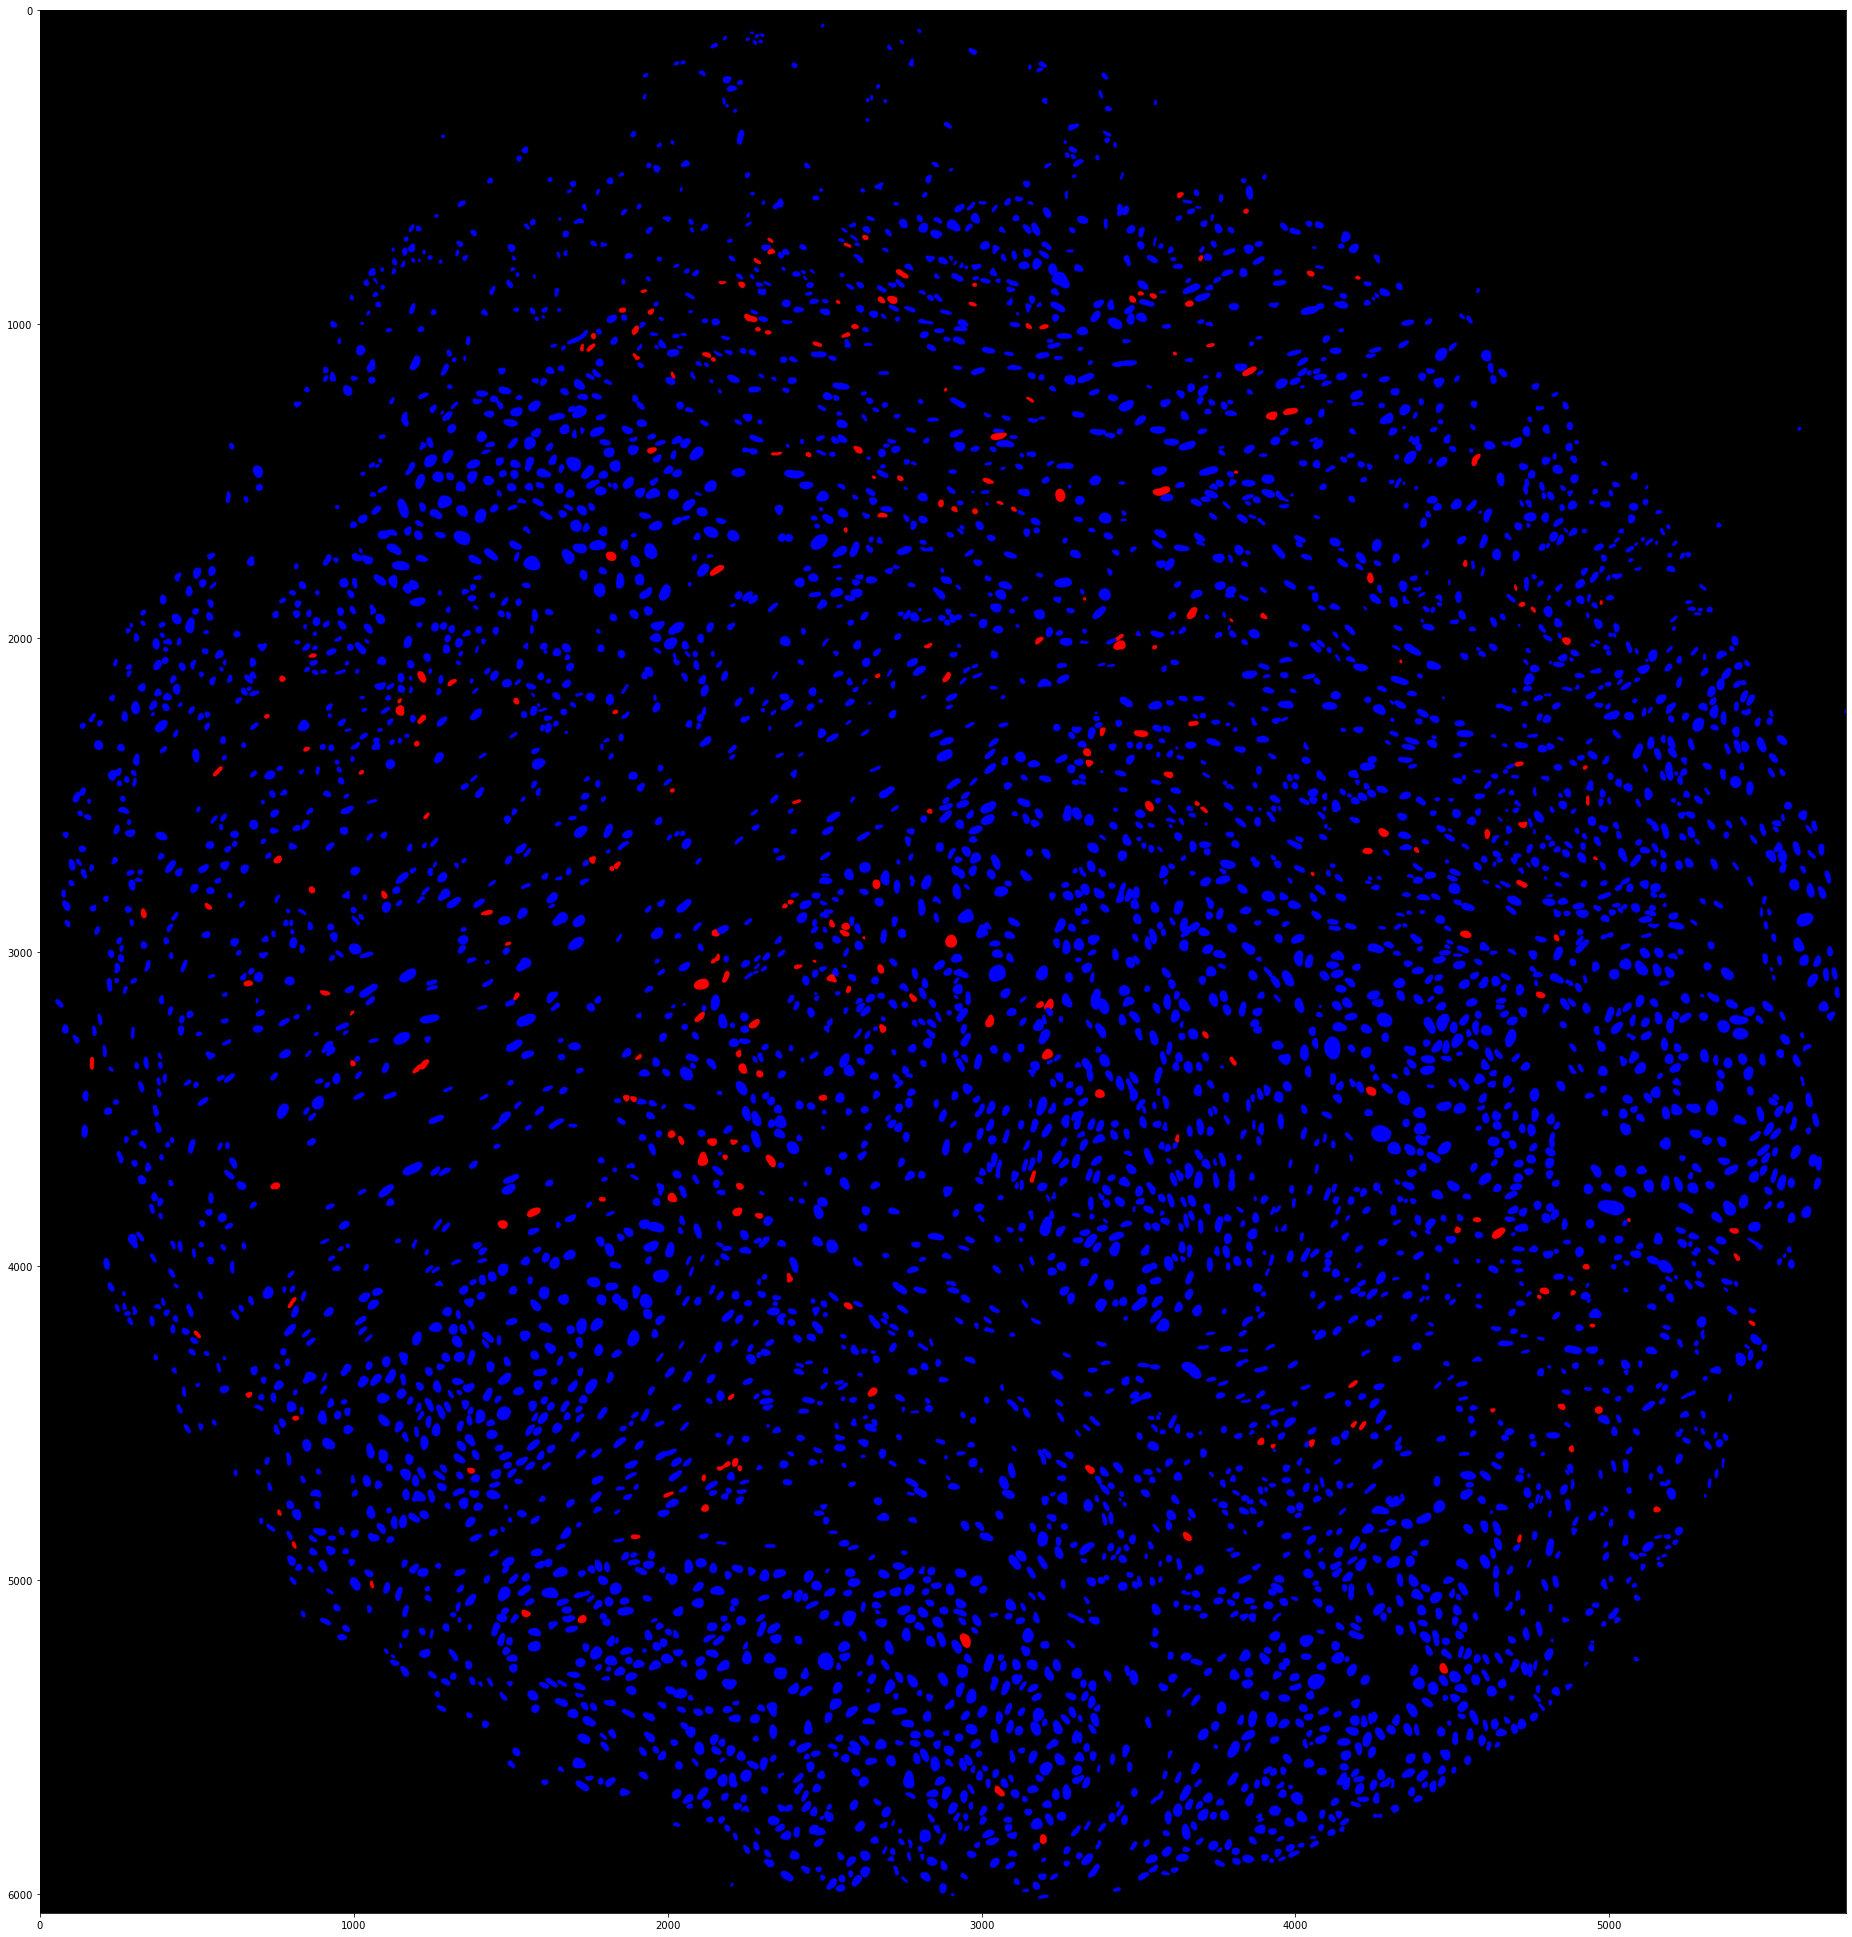

In [7]:
plt.figure(figsize=(35,35))
plt.imshow(merge)

***Same Prediction***

In [10]:
unique_samepred_cd3p = np.unique(same_pred_cd3p)
unique_samepred_cd3n = np.unique(same_pred_cd3n)

same_pred_common_indexes = np.intersect1d(unique_samepred_cd3p, unique_samepred_cd3n)
same_pred_common_indexes

array([   0,    2,    4, ..., 5698, 5699, 5703], dtype=int32)

In [11]:
for i in same_pred_common_indexes:

    if i!=0:

        if np.count_nonzero(same_pred_cd3p == i)>=np.count_nonzero(same_pred_cd3n == i):
            
            same_pred_cd3p[same_pred_cd3n==i]=i
            same_pred_cd3n[same_pred_cd3n==i]=0  
        
        if np.count_nonzero(same_pred_cd3p == i)<np.count_nonzero(same_pred_cd3n == i):

            same_pred_cd3n[same_pred_cd3p==i]=i
            same_pred_cd3p[same_pred_cd3p==i]=0

In [12]:
r=(same_pred_cd3p>0)*255
b=(same_pred_cd3n>0)*255
merge=cv2.merge([r,np.zeros_like(b),b])

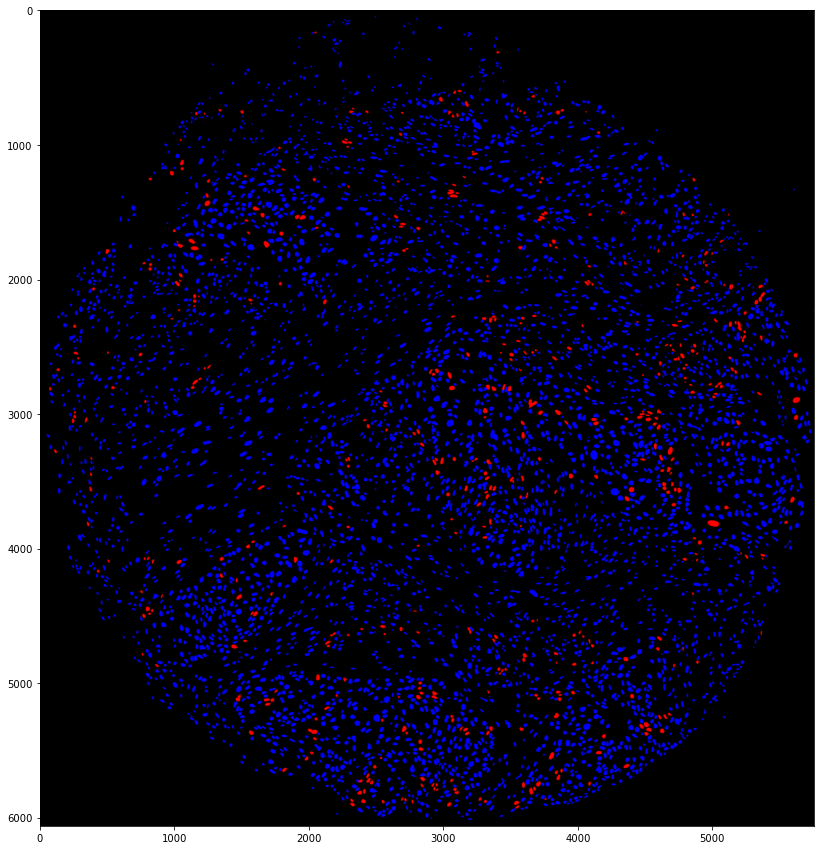

In [16]:
plt.figure(figsize=(15,15))
plt.imshow(merge)

In [12]:
gt_p = []
gt_n = []
pred_p = []
pred_n = []

gt = []
pred = []

v1,c1=np.unique(gt_data_cd3p,return_counts=True)
gt_p = v1[(v1 != 0)]

v2,c2=np.unique(gt_data_cd3n,return_counts=True)
gt_n = v2[(v2 != 0)]

v3,c3=np.unique(same_pred_cd3p,return_counts=True)
pred_p = v3[~np.isin(v3, pred_p) & (v3 != 0)]

    
v4,c4=np.unique(same_pred_cd3n,return_counts=True)
pred_n = v4[~np.isin(v4, pred_n) & (v4 != 0)]

tp = set(gt_p)&set(pred_p)
tn = set(gt_n)&set(pred_n)
fn = (set(pred_n)-(set(pred_n)&set(gt_n))).union(set(gt_p)-set(pred_p))
fp = (set(pred_p)-(set(pred_p)&set(gt_p))).union(set(gt_n)-set(pred_n))

print(len(gt_p)+len(gt_n))
print("lalalala")
print(len(tp)+len(tn)+len(fp)+len(fn))

if not (len(tp)==0 and len(tn)==0 and len(fn)==0 and len(fp)==0):

        if (len(tp)+len(fn))>0 and ((len(tn)+len(fp)))>0 and (len(tp)+len(fp)):

            precision = len(tp)/(len(tp)+len(fp))
            recall = len(tp)/(len(tp)+len(fn))

            if (precision+recall)>0:

                f1_score = 2*(precision*recall)/(precision+recall)

                print("Name:", gt_cd3p.split("/")[-1])
                print('TP:', len(tp))
                print('TN:', len(tn))
                print('FP:', len(fp))
                print('FN:', len(fn))
                print("Accurcy:", (len(tp)+len(tn))/(len(tp)+len(tn)+len(fp)+len(fn)))
                print("F1 Score:", f1_score)
                print("Sensitivity:", ((len(tp))/(len(tp)+len(fn))))
                print("Specificity:", ((len(tn))/(len(tn)+len(fp))))

8287
lalalala
8287
Name: 034.npy
TP: 344
TN: 5981
FP: 1075
FN: 887
Accurcy: 0.7632436346084228
F1 Score: 0.2596226415094339
Sensitivity: 0.2794476035743298
Specificity: 0.8476473922902494


***Serial Pred***

In [13]:
unique_serialpred_cd3p = np.unique(serial_pred_cd3p)
unique_serialpred_cd3n = np.unique(serial_pred_cd3n)

serial_pred_common_indexes = np.intersect1d(unique_serialpred_cd3p, unique_serialpred_cd3n)
serial_pred_common_indexes

array([   0,    3,    4, ..., 8274, 8276, 8278], dtype=int32)

In [14]:
for i in serial_pred_common_indexes:

    if i!=0:

        if np.count_nonzero(serial_pred_cd3p == i)>=np.count_nonzero(serial_pred_cd3n == i):
            
            serial_pred_cd3p[serial_pred_cd3n==i]=i
            serial_pred_cd3n[serial_pred_cd3n==i]=0  
        
        if np.count_nonzero(serial_pred_cd3p == i)<np.count_nonzero(serial_pred_cd3n == i):

            serial_pred_cd3n[serial_pred_cd3p==i]=i
            serial_pred_cd3p[serial_pred_cd3p==i]=0

In [15]:
r=(serial_pred_cd3p>0)*255
b=(serial_pred_cd3n>0)*255
merge=cv2.merge([r,np.zeros_like(b),b])

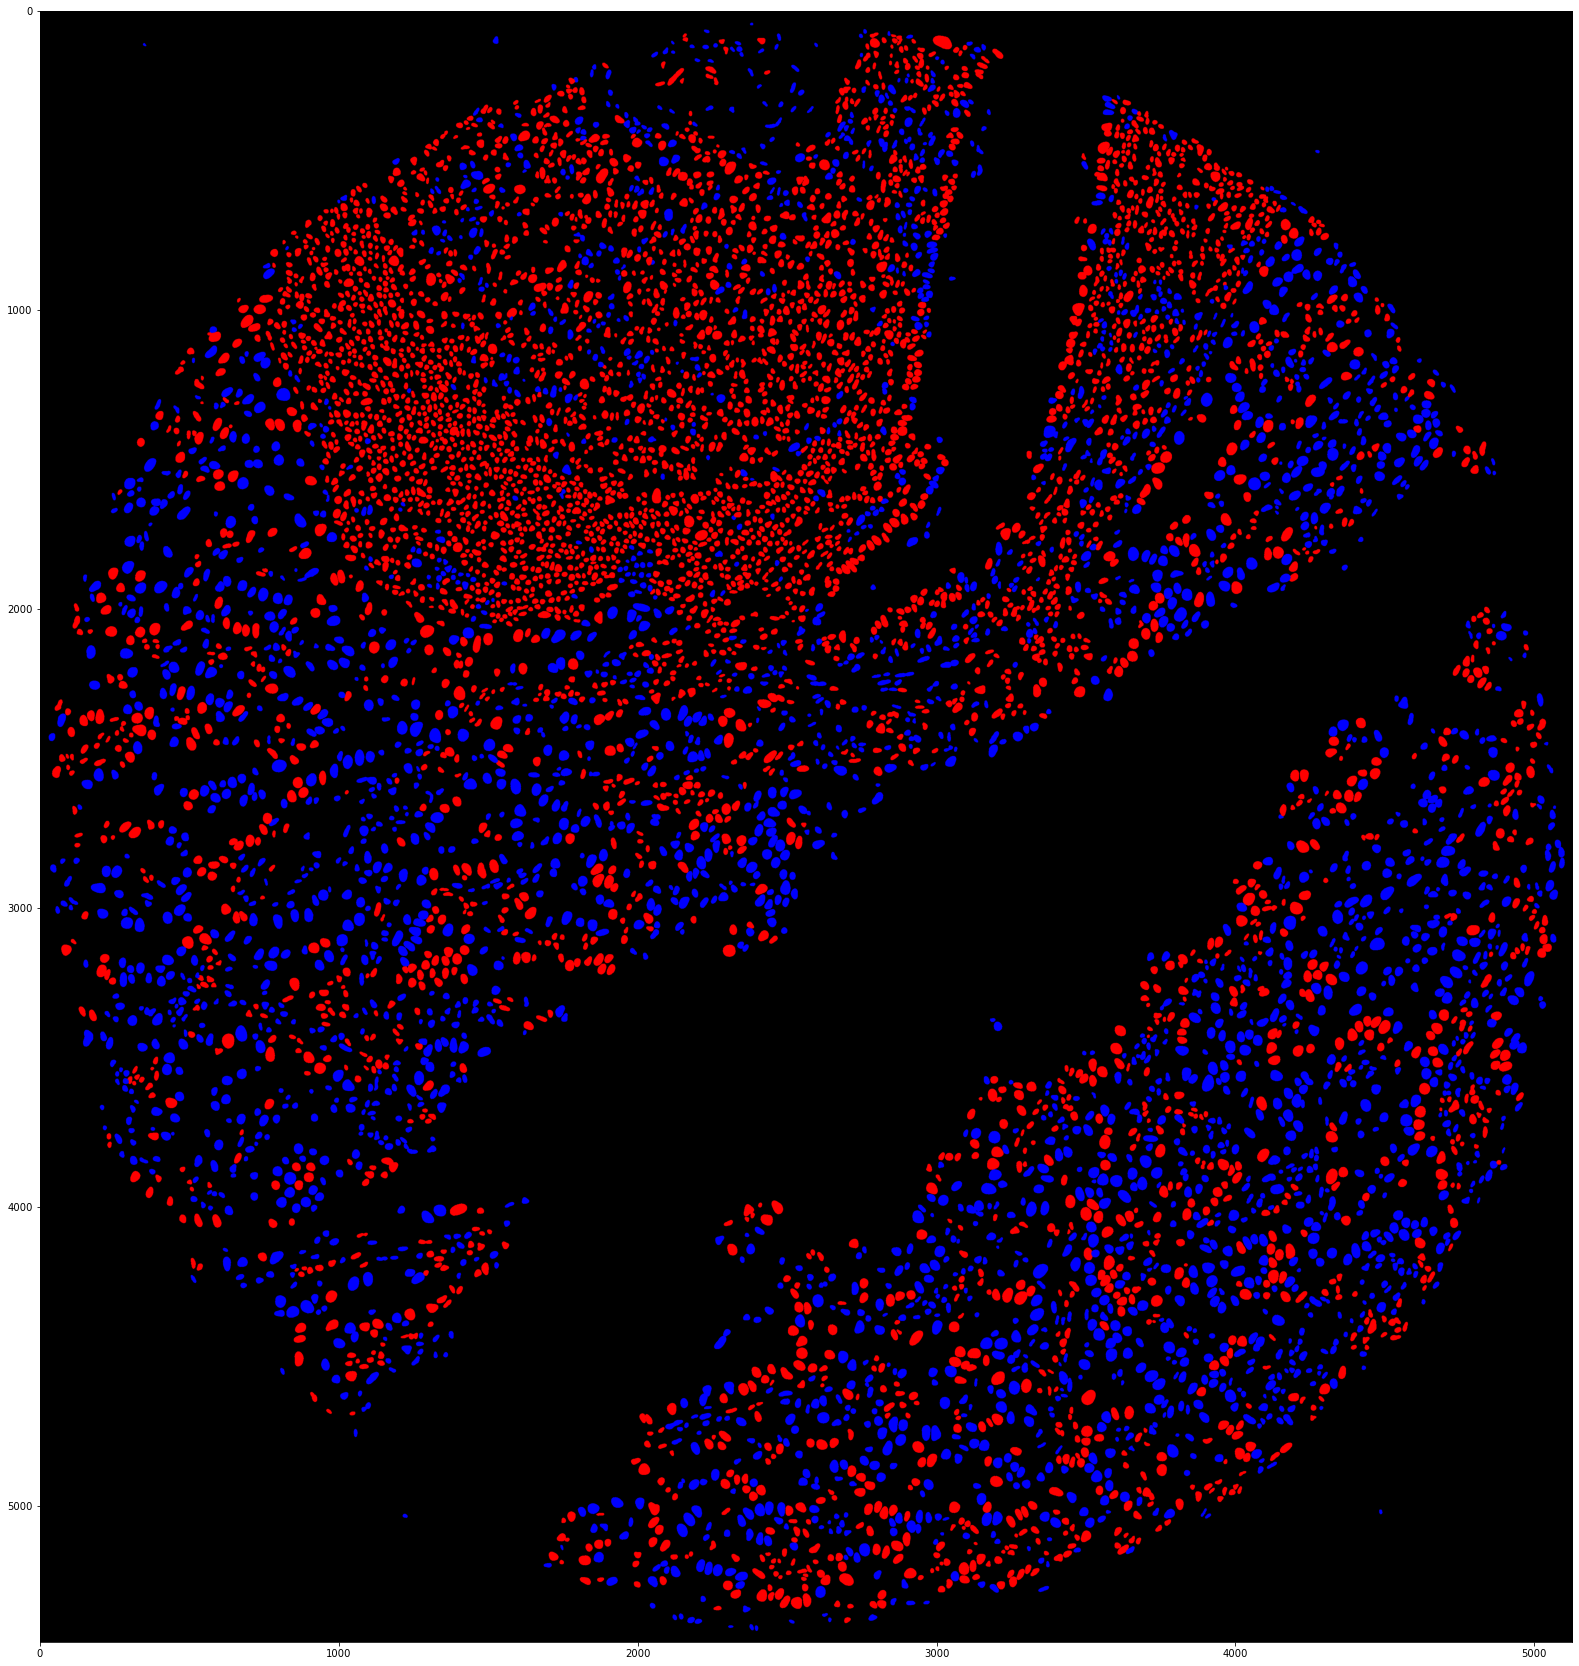

In [16]:
plt.figure(figsize=(30,30))
plt.imshow(merge)

In [17]:
gt_p = []
gt_n = []
pred_p = []
pred_n = []

gt = []
pred = []

v1,c1=np.unique(gt_data_cd3p,return_counts=True)
gt_p = v1[(v1 != 0)]

v2,c2=np.unique(gt_data_cd3n,return_counts=True)
gt_n = v2[(v2 != 0)]
    

v3,c3=np.unique(serial_pred_cd3p,return_counts=True)
pred_p = v3[~np.isin(v3, pred_p) & (v3 != 0)]

    
v4,c4=np.unique(serial_pred_cd3n,return_counts=True)
pred_n = v4[~np.isin(v4, pred_n) & (v4 != 0)]

tp = set(gt_p)&set(pred_p)
tn = set(gt_n)&set(pred_n)
fn = (set(pred_n)-(set(pred_n)&set(gt_n))).union(set(gt_p)-set(pred_p))
fp = (set(pred_p)-(set(pred_p)&set(gt_p))).union(set(gt_n)-set(pred_n))

print(len(gt_p)+len(gt_n))
#print("lalalala")
print(len(tp)+len(tn)+len(fp)+len(fn))

if not (len(tp)==0 and len(tn)==0 and len(fn)==0 and len(fp)==0):

        if (len(tp)+len(fn))>0 and ((len(tn)+len(fp)))>0 and (len(tp)+len(fp)):

            precision = len(tp)/(len(tp)+len(fp))
            recall = len(tp)/(len(tp)+len(fn))

            if (precision+recall)>0:

                f1_score = 2*((precision*recall)/(precision+recall))

                print("Name:", gt_cd3p.split("/")[-1])
                print('TP:', len(tp))
                print('TN:', len(tn))
                print('FP:', len(fp))
                print('FN:', len(fn))
                print("Accurcy:", (len(tp)+len(tn))/(len(tp)+len(tn)+len(fp)+len(fn)))
                print("F1 Score:", f1_score)
                print("Sensitivity:", ((len(tp))/(len(tp)+len(fn))))
                print("Specificity:", ((len(tn))/(len(tn)+len(fp))))

8287
lalalala
8287
Name: 034.npy
TP: 950
TN: 2995
FP: 4061
FN: 281
Accurcy: 0.47604682032098466
F1 Score: 0.3043896187119513
Sensitivity: 0.7717303005686433
Specificity: 0.42446145124716556
